In [ ]:
!pip install tensorflow_decision_forests

In [ ]:
!pip install shap

    task  difficulty  average_rest  mood_before_work  mood_after_work  \
0      5           4           5.0                 2                1   
1      4           3           1.0                 0                0   
2      2           3           2.0                 0                0   
3      6           4           3.0                 1                1   
4      1           3           0.5                 1                0   
..   ...         ...           ...               ...              ...   
67     1           4           0.2                 1                1   
68     5           4           1.0                 2                0   
69     6           3           0.4                 2                1   
70     0           3           0.4                 0                0   
71     6           4           1.0                 2                1   

    deadline  importance  sleep_average  urgency  total_gangguan  \
0          4           1            7.0        2       

Training dataset read in 0:00:00.570000. Found 50 examples.
Training model...
Model trained in 0:00:00.047693
Compiling model...
Model compiled.


1/1 [==============================] - 0s 119ms/step
Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.33      0.60      0.43         5
           2       0.83      0.83      0.83         6
           3       0.67      0.40      0.50         5

    accuracy                           0.50        22
   macro avg       0.52      0.50      0.49        22
weighted avg       0.52      0.50      0.49        22

2/2 [==============================] - 0s 6ms/step
Accuracy on training data: 0.86
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       1.00      0.77      0.87        13
           2       0.92      0.92      0.92        12
           3       0.91      0.77      0.83        13

    accuracy                           0.86        50
   macro avg       0.88 

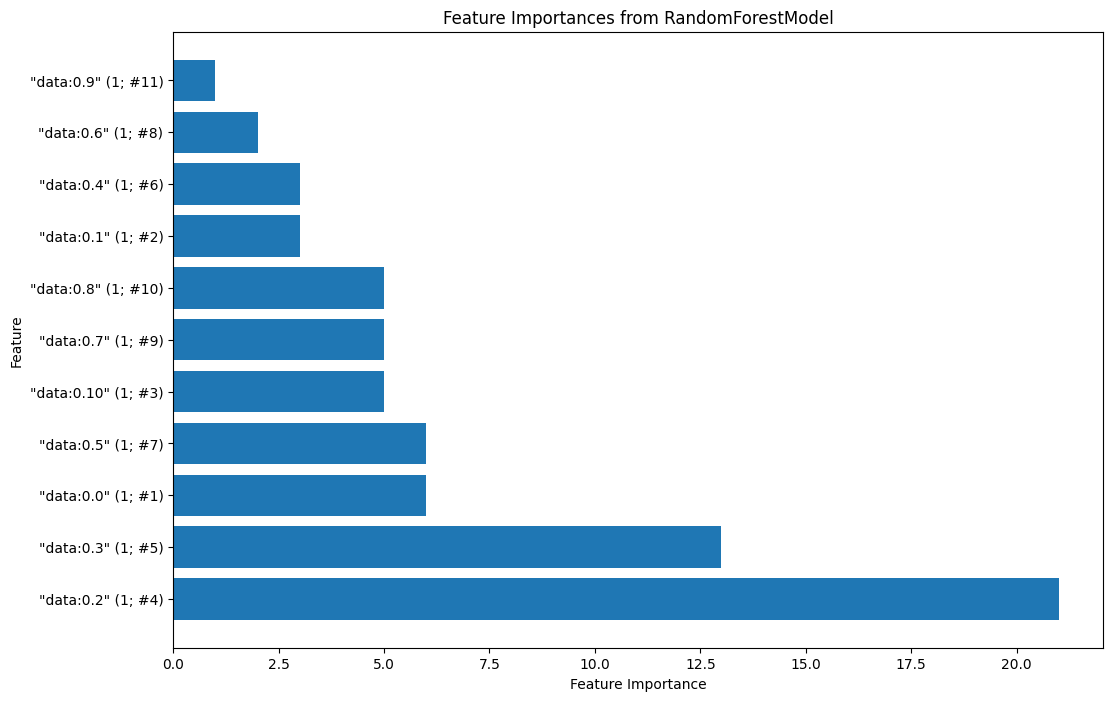

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

file_path = 'https://github.com/iMnuelll/Bangkit_Capstone/raw/main/Preprocessing/data_gform_after_flatten.csv'
data = pd.read_csv(file_path, sep='|')

# Define the features and target label
features = [
    'task',
    # 'job',
    # 'gender',
    'difficulty',
    'average_rest',
    'mood_before_work',
    'mood_after_work',
    'deadline',
    'importance',
    'sleep_average',
    'urgency',
    'total_gangguan',
    'work_hour_label',
]

target = 'productive_time'

X = data[features]
y = data[target]

# Encode categorical variables
X = pd.get_dummies(X)
le = LabelEncoder()
y = le.fit_transform(y)

print(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y,
                                                    )

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to TensorFlow Datasets
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Define the Random Forest model
model = tfdf.keras.RandomForestModel(
    num_trees=70,
    # max_depth=14,
    # criterion='entropy',
    # min_examples=10,
    random_seed=42
)

# Train the model
model.fit(train_ds)

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
report = classification_report(y_test, y_pred_classes)

# Output the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Make predictions on training data
y_pred_train = model.predict(X_train)
y_pred_train_classes = tf.argmax(y_pred_train, axis=1).numpy()

# Evaluate the model on training data
accuracy_train = accuracy_score(y_train, y_pred_train_classes)
report_train = classification_report(y_train, y_pred_train_classes)
print(f"Accuracy on training data: {accuracy_train:.2f}")
print("Classification Report for Training Data:")
print(report_train)

# Feature importances from TensorFlow Decision Forests model
importances = model.make_inspector().variable_importances()

# Extract feature names and importance values
feature_importance_dict = importances['NUM_AS_ROOT']
features = [item[0] for item in feature_importance_dict]
importances_values = [item[1] for item in feature_importance_dict]

# Ensure the types are correct for plotting
features = [str(feature) for feature in features]
importances_values = [float(importance) for importance in importances_values]

# Visualizing Feature Importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(features, importances_values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from RandomForestModel")
plt.show()


In [ ]:
model.summary()

Model: "random_forest_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (11):
	data:0.0
	data:0.1
	data:0.10
	data:0.2
	data:0.3
	data:0.4
	data:0.5
	data:0.6
	data:0.7
	data:0.8
	data:0.9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.  "data:0.2"  0.396908 ################
    2.  "data:0.3"  0.297832 #####
    3.  "data:0.7"  0.277086 ###
    4.  "data:0.0"  0.273344 ##
    5.  "data:0.8"  0.272418 ##
    6.  "data:0.5"  0.268452 ##
    7. "data:0.10"  0.265493 #
    8.  "data:0.1"  0.261269 #
    9.  "data:0.6"  0.260386 #
   10.  "data:0.9"  0.253665 
   11.  "data:0.4"  0.248348 

Variable Importance: NUM_AS_ROOT:
    1.  "data:0.2" 21.000000 #

In [ ]:
# Print the columns of the encoded DataFrame
print("Encoded Feature Names:")
print(X.columns.tolist())

Encoded Feature Names:
['task', 'difficulty', 'average_rest', 'mood_before_work', 'mood_after_work', 'deadline', 'importance', 'sleep_average', 'urgency', 'total_gangguan', 'work_hour_label']


In [ ]:
# Feature importances from TensorFlow Decision Forests model
inspector = model.make_inspector()
feature_importance_dict = inspector.variable_importances()["NUM_AS_ROOT"]
# print(feature_importance_dict)
# Extract feature names and importance values
features = [str(item[0]) for item in feature_importance_dict]
importances_values = [item[1] for item in feature_importance_dict]

# Print features and their importances for debugging
print("Features and their importances from inspector:")
for feature, importance in zip(features, importances_values):
    print(f"{feature}: {importance}")


Features and their importances from inspector:
"data:0.2" (1; #4): 21.0
"data:0.3" (1; #5): 13.0
"data:0.0" (1; #1): 6.0
"data:0.5" (1; #7): 6.0
"data:0.10" (1; #3): 5.0
"data:0.7" (1; #9): 5.0
"data:0.8" (1; #10): 5.0
"data:0.1" (1; #2): 3.0
"data:0.4" (1; #6): 3.0
"data:0.6" (1; #8): 2.0
"data:0.9" (1; #11): 1.0


In [ ]:
# Create a dictionary to map encoded features back to their original feature names
encoded_to_original = {}
for original_feature in features:
    matching_encoded_features = [encoded_feature for encoded_feature in feature if encoded_feature.startswith(original_feature)]
    for encoded_feature in matching_encoded_features:
        encoded_to_original[encoded_feature] = original_feature

# print(matching_encoded_features)
# Print the mapping for debugging
print("Encoded to Original Feature Mapping:")
for encoded, original in encoded_to_original.items():
    print(f"{encoded}: {original}")


Encoded to Original Feature Mapping:


In [ ]:
# Map encoded feature names from the model to the original feature names
mapped_features = [encoded_to_original.get(feature, feature) for feature in features]

# Print the mapped features for debugging
print("Mapped Features and their importances:")
for feature, importance in zip(mapped_features, importances_values):
    print(f"{feature}: {importance}")


Mapped Features and their importances:
"data:0.2" (1; #4): 21.0
"data:0.3" (1; #5): 13.0
"data:0.0" (1; #1): 6.0
"data:0.5" (1; #7): 6.0
"data:0.10" (1; #3): 5.0
"data:0.7" (1; #9): 5.0
"data:0.8" (1; #10): 5.0
"data:0.1" (1; #2): 3.0
"data:0.4" (1; #6): 3.0
"data:0.6" (1; #8): 2.0
"data:0.9" (1; #11): 1.0
